In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\\Users\\UNKNOWN_CODER\\DSDBA\\Assign6\\iris.csv')

In [7]:
print("-----------Dataframe Head------------")  
print(df.head())
print("\n")

-----------Dataframe Head------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2  setosa
1   2            4.9           3.0            1.4           0.2  setosa
2   3            4.7           3.2            1.3           0.2  setosa
3   4            4.6           3.1            1.5           0.2  setosa
4   5            5.0           3.6            1.4           0.2  setosa




In [8]:
print("-----------Dataframe Describe------------")
print(df.describe())
print("\n")

-----------Dataframe Describe------------
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000




In [9]:
print("-----------Dataframe Info------------")
print(df.info())
print("\n")

-----------Dataframe Info------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None




In [10]:
print("----------------Data Preprocessing----------------")
X = df.iloc[:,0:4]
Y = df['Species'].values

----------------Data Preprocessing----------------


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')
print("\n")

Train Dataset Size - X: (120, 4), Y: (120,)
Test  Dataset Size - X: (30, 4), Y: (30,)




In [14]:
print("---------------Naive Bayes Classifier----------------------")
from sklearn.naive_bayes import GaussianNB

---------------Naive Bayes Classifier----------------------


In [15]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)

In [16]:
mapper = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
predictions_ = [mapper[i] for i in predictions]

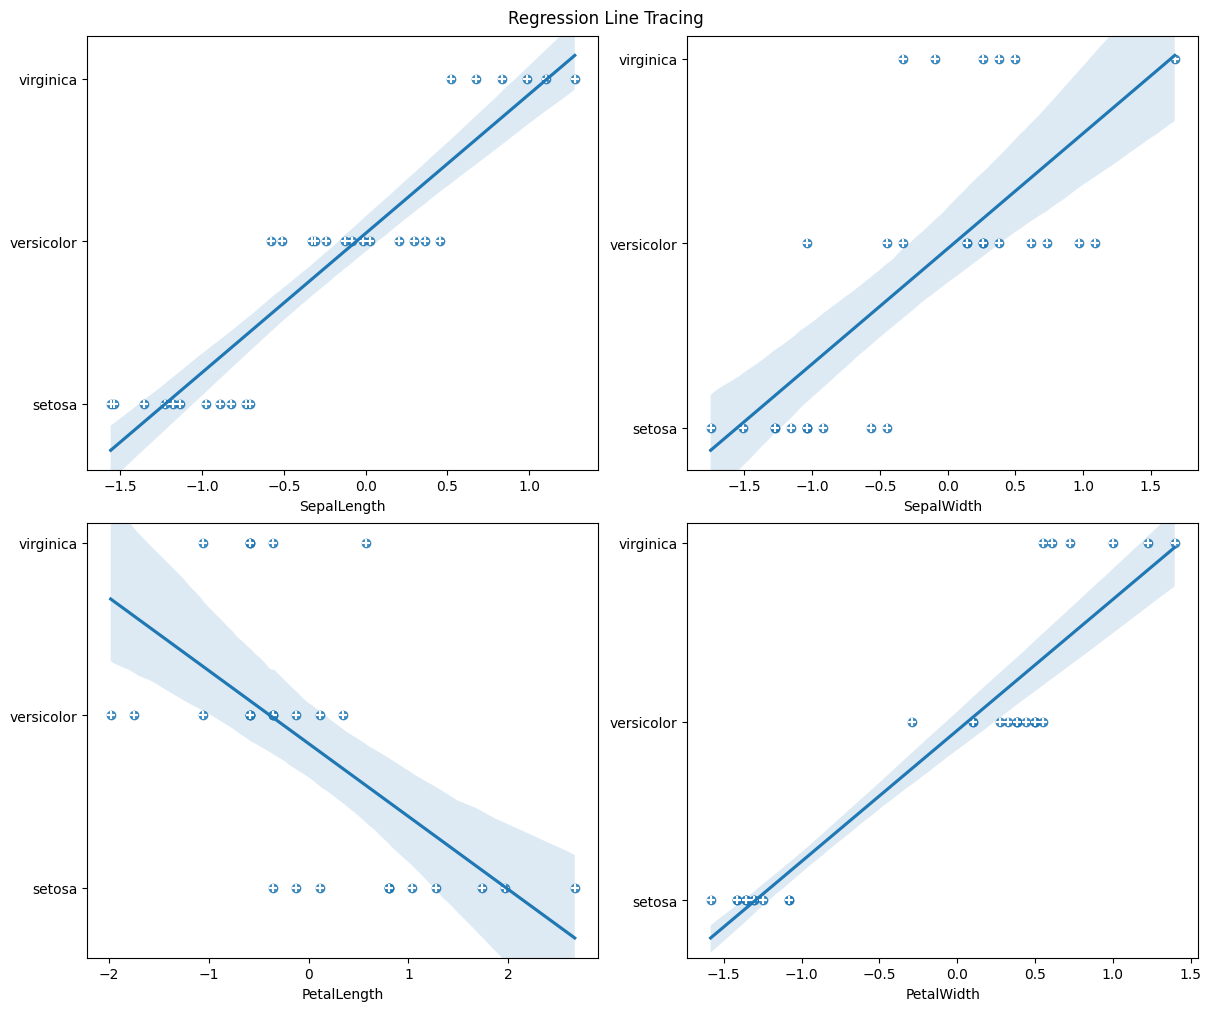

In [23]:
fig, axs = plt.subplots(2, 2, figsize = (12, 10), constrained_layout = True);
_ = fig.suptitle('Regression Line Tracing')
for i in range(4):
    x, y = i // 2, i % 2
    _ = sns.regplot(x = X_test[:, i], y = predictions_, ax=axs[x, y])
    _ = axs[x, y].scatter(X_test[:, i][::-1], Y_test[::-1], marker = '+', color="white")
    _ = axs[x, y].set_xlabel(df.columns[i + 1][:-2])
plt.show()
print("\n")

In [17]:
print("------------Confusion Matrix-------------")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

------------Confusion Matrix-------------


In [29]:
import numpy as np
y = df.iloc[:, -1]
# Get unique class labels from the dataset
labels = y.unique()

# Generate the confusion matrix using test labels and predictions
cm = confusion_matrix(Y_test, predictions, labels=labels)

# Display TP, FP, FN, TN for each class
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"\nClass: {label}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")


Class: setosa
True Positives (TP): 11
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 19

Class: versicolor
True Positives (TP): 13
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 17

Class: virginica
True Positives (TP): 6
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 24


In [30]:
cm = classification_report(Y_test, predictions)
print('Classification report : \n', cm)

Classification report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

